In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-07-11 19:56:34--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolviendo storage.googleapis.com (storage.googleapis.com)... 142.250.64.240, 172.217.1.112, 172.217.3.80, ...
Conectando con storage.googleapis.com (storage.googleapis.com)[142.250.64.240]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 149574867 (143M) [application/zip]
Guardando como: “/tmp/horse-or-human.zip”

/tmp/horse-or-human 100%[===================>] 142,65M   288KB/s    en 4m 50s  

2020-07-11 20:01:28 (504 KB/s) - “/tmp/horse-or-human.zip” guardado [149574867/149574867]



In [6]:

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-07-11 20:06:50--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolviendo storage.googleapis.com (storage.googleapis.com)... 172.217.8.112, 142.250.64.176, 172.217.2.80, ...
Conectando con storage.googleapis.com (storage.googleapis.com)[172.217.8.112]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 11480187 (11M) [application/zip]
Guardando como: “/tmp/validation-horse-or-human.zip”

/tmp/validation-hor 100%[===================>]  10,95M   345KB/s    en 33s     

2020-07-11 20:07:24 (335 KB/s) - “/tmp/validation-horse-or-human.zip” guardado [11480187/11480187]



El siguiente código de Python utilizará la biblioteca del sistema operativo OS, para usar las bibliotecas del sistema operativo, lo que le dará acceso al sistema de archivos y a la biblioteca de archivos zip que le permitirá descomprimir los datos.

In [2]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

El contenido del archivo .zip se extrae al directorio base / tmp / horse-or-human, que a su vez contiene subdirectorios de caballos y humanos.

El conjunto de entrenamiento son los datos que se utilizan para decirle al modelo de red neuronal que "así es como se ve un caballo", "así es como se ve un humano", etc.

No etiquetamos explícitamente las imágenes como caballos o humanos. esto está codificado para leer imágenes de subdirectorios y etiquetarlas automáticamente con el nombre de ese subdirectorio. Entonces, por ejemplo, tendrá un directorio de 'entrenamiento' que contiene un directorio de 'caballos' y uno de 'humanos'. ImageGenerator etiquetará las imágenes apropiadamente para usted, reduciendo un paso de codificación.

Definamos cada uno de estos directorios:

In [3]:
# Directorio con nuestro conjunto de entrenamiento de imagenes de caballos 
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directorio con nuestro conjunto de entrenamiento de imagenes de humanos
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directorio con nuestro conjunto de validacion de imagenes de caballos
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directorio con nuestro conjunto de validacion de imagenes de humanos
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

Veamos cómo se ven los nombres de los archivos en los directorios de entrenamiento de caballos y humanos:

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse10-2.png', 'horse04-3.png', 'horse45-5.png', 'horse26-5.png', 'horse45-0.png', 'horse37-4.png', 'horse46-4.png', 'horse39-2.png', 'horse31-1.png', 'horse33-1.png']
['human09-21.png', 'human01-21.png', 'human12-19.png', 'human16-02.png', 'human11-02.png', 'human15-01.png', 'human14-12.png', 'human11-08.png', 'human14-02.png', 'human12-29.png']
['horse1-127.png', 'horse4-102.png', 'horse2-294.png', 'horse5-192.png', 'horse5-458.png', 'horse1-000.png', 'horse3-469.png', 'horse4-159.png', 'horse5-123.png', 'horse3-584.png']
['valhuman05-20.png', 'valhuman05-17.png', 'valhuman02-10.png', 'valhuman01-24.png', 'valhuman05-10.png', 'valhuman04-19.png', 'valhuman03-08.png', 'valhuman01-18.png', 'valhuman02-13.png', 'valhuman02-06.png']


Veamos el número total de imágenes de caballos y humanos en los directorios:

In [5]:
print('total conjunto de imagenes de caballo de entrenamiento:', len(os.listdir(train_horse_dir)))
print('total conjunto de imagenes de humano de entrenamiento:', len(os.listdir(train_human_dir)))
print('total conjunto de imagenes de caballo de validacion:', len(os.listdir(validation_horse_dir)))
print('total conjunto de imagenes de humano de validacion:', len(os.listdir(validation_human_dir)))

total conjunto de imagenes de caballo de entrenamiento: 500
total conjunto de imagenes de humano de entrenamiento: 527
total conjunto de imagenes de caballo de validacion: 128
total conjunto de imagenes de humano de validacion: 128


Echemos un vistazo a algunas imágenes para tener una mejor idea de cómo se ven, configurando primero los parámetros de la trama:

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parametros de nuestro grafico; esta es una configuracion de 4x4
nrows = 4
ncols = 4

# Numero de iteraciones sobre las imagenes
pic_index = 0

Veamos un resumen de 8 imagenes de humanos y 8 de caballo de nuestra data

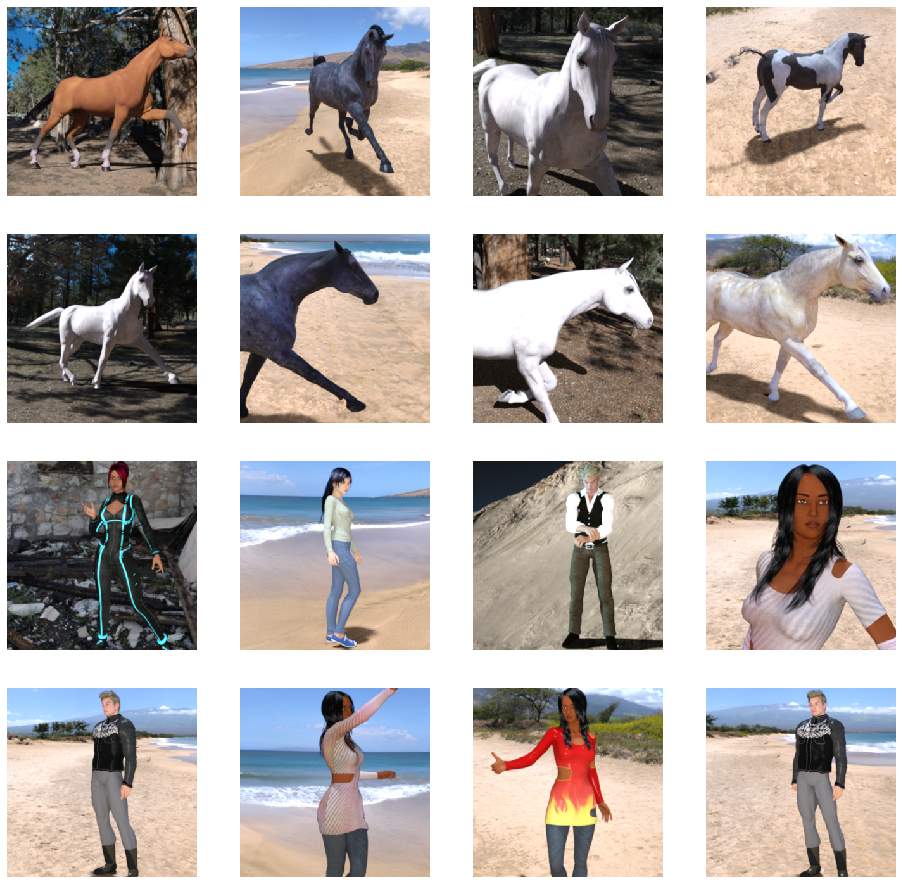

In [7]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Construyendo un pequeño modelo desde cero

Antes de definir el modelo importemos tensorflow

In [8]:
import tensorflow as tf

agregamos capas convolucionales y aplanar el resultado final para alimentar las capas densamente conectadas.

Finalmente agregando las capas densamente conectadas.

Dado que este es un problema de clasificación de dos clases, es decir, un problema de clasificación binaria, la red terminará con una funcion de activación sigmoidea, de modo que la salida de nuestra red será un solo escalar entre 0 y 1, codificando la probabilidad de que la imagen actual sea de clase 1 (en oposición a la clase 0).

In [9]:
model = tf.keras.models.Sequential([
    # Notemos que la imagen de entrada es de tamaño 300x300 con 3 bytes color
    # Esta es la primera convolucion
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # La segunda convolucion
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # La tercera convolucion
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # La cuarta convolucion
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # La quinta convolucion
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Acoplar los resultados para alimentar a un DNN
    tf.keras.layers.Flatten(),
    # Capa oculta de 512 neuronas
    tf.keras.layers.Dense(512, activation='relu'),
    # Solo 1 neurona de salida. Contendrá un valor de 0-1 donde 0 para 1 clase ('caballos') y 1 para la otra ('humanos')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

La llamada al método model.summary () imprime un resumen de NN

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

La columna "forma de salida" muestra cómo evoluciona el tamaño de su mapa de características en cada capa sucesiva. Las capas de convolución reducen un poco el tamaño de los mapas de entidades debido al relleno, y cada capa de agrupación reduce a la mitad las dimensiones.

configurando las especificaciones para el entrenamiento modelo. entrenando nuestro modelo con la pérdida de binary_crossentropy, ya que es un problema de clasificación binaria y nuestra activación final es un sigmoide. (utilizando el optimizador rmsprop con una tasa de aprendizaje de 0.001. Durante el entrenamiento, querremos monitorear la precisión de la clasificación.

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

## Procesando la data

configurando generadores de datos que leerán imágenes en nuestras carpetas de origen, las convertirán en tensores float32 y las alimentarán (con sus etiquetas) a nuestra red. Tendremos un generador para las imágenes de entrenamiento y otro para las imágenes de validación. Nuestros generadores producirán lotes de imágenes de tamaño 300x300 y sus etiquetas (binarias).

los datos que ingresan a las redes neuronales generalmente deben normalizarse de alguna manera para que sean más susceptibles de ser procesados ​​por la red. (No es habitual alimentar píxeles sin formato en una red de conexión.) En nuestro caso, procesaremos previamente nuestras imágenes normalizando los valores de píxeles para que estén en el rango [0, 1] (originalmente todos los valores están en el rango [0, 255] )

(En Keras, esto se puede hacer a través de la clase **keras.preprocessing.image.ImageDataGenerator** utilizando el parámetro reescalar. Esta clase ImageDataGenerator le permite crear instancias de lotes de imágenes aumentadas (y sus etiquetas) a través de .flow (datos, etiquetas) o .flow_from_directory (directorio). Estos generadores se pueden usar con los métodos del modelo Keras que aceptan generadores de datos como entradas: fit_generator, Evaluation_generator y predict_generator.)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Todas las imágenes serán reescaladas por 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Imágenes de entrenamiento de flujo en lotes de 128 usando el generador train_datagen
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # Este es el directorio fuente de las imágenes de entrenamiento.
        target_size=(300, 300),  # Todas las imágenes serán redimensionadas a 150x150
        batch_size=128,
        # Como usamos la pérdida de binary_crossentropy, necesitamos etiquetas binarias
        class_mode='binary')

# Imágenes de entrenamiento de flujo en lotes de 128 usando el generador train_datagen
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # Este es el directorio fuente de las imágenes de entrenamiento.
        target_size=(300, 300),  # Todas las imágenes serán redimensionadas a 150x150
        batch_size=32,
        # Como usamos la pérdida de binary_crossentropy, necesitamos etiquetas binarias
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Entrenando
Entrenando con 15 "epochs"

In [13]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 75s 9s/step - loss: 0.9571 - acc: 0.5929 - val_loss: 2.2027 - val_acc: 0.5000
Epoch 2/15
8/8 [==============================] - 78s 10s/step - loss: 0.7525 - acc: 0.6196 - val_loss: 1.2148 - val_acc: 0.5000
Epoch 3/15
8/8 [==============================] - 89s 11s/step - loss: 0.6881 - acc: 0.6797 - val_loss: 0.5465 - val_acc: 0.7305
Epoch 4/15
8/8 [==============================] - 78s 10s/step - loss: 0.4733 - acc: 0.8142 - val_loss: 1.2819 - val_acc: 0.6758
Epoch 5/15
8/8 [==============================] - 81s 10s/step - loss: 0.3592 - acc: 0.8610 - val_loss: 1.0345 - val_acc: 0.6484
Epoch 6/15
8/8 [==============================] - 69s 9s/step - loss: 0.2738 - acc: 0.9121 - val_loss: 0.7067 - val_acc: 0.8359
Epoch 7/15
8/8 [==============================] - 79s 10s/step - loss: 0.1098 - acc: 0.9577 - val_loss: 1.9065 - val_acc: 0.8008
Epoch 8/15
8/8 [==============================] - 91s 11s/step - loss: 0.1189 - acc: 0.9521 - val_l

## Ejecutando el modelo
Ahora en realidad ejecuta una predicción usando el modelo. Este código le permitirá elegir 1 o más archivos de su sistema de archivos, se cargarán y se ejecutarán a través del modelo, dando una indicación de si el objeto es un caballo o un humano.

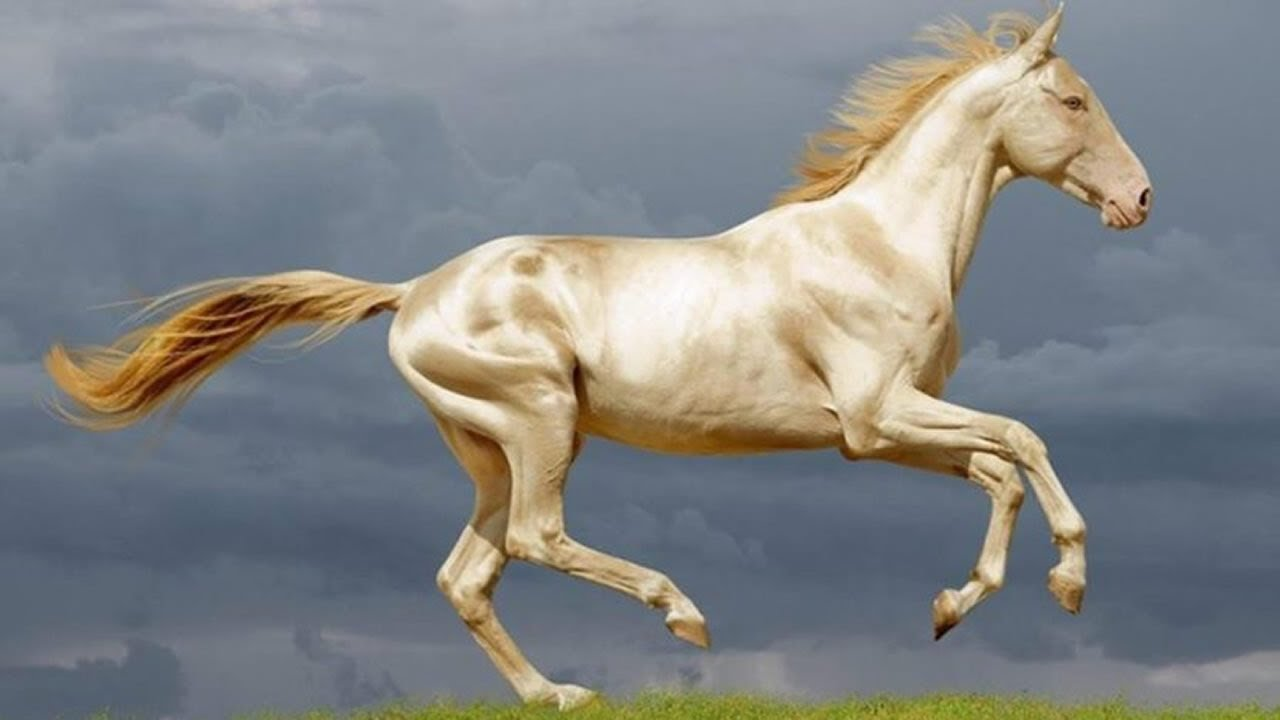

foto1.jpg es un Caballo


In [33]:
import numpy as np
from keras.preprocessing import image

path= 'foto1.jpg'
img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
  

from IPython.display import Image
display(Image(filename=path))
 
if classes[0]>0.5:
    print(path + " es un Humano")
else:
    print(path + " es un Caballo")

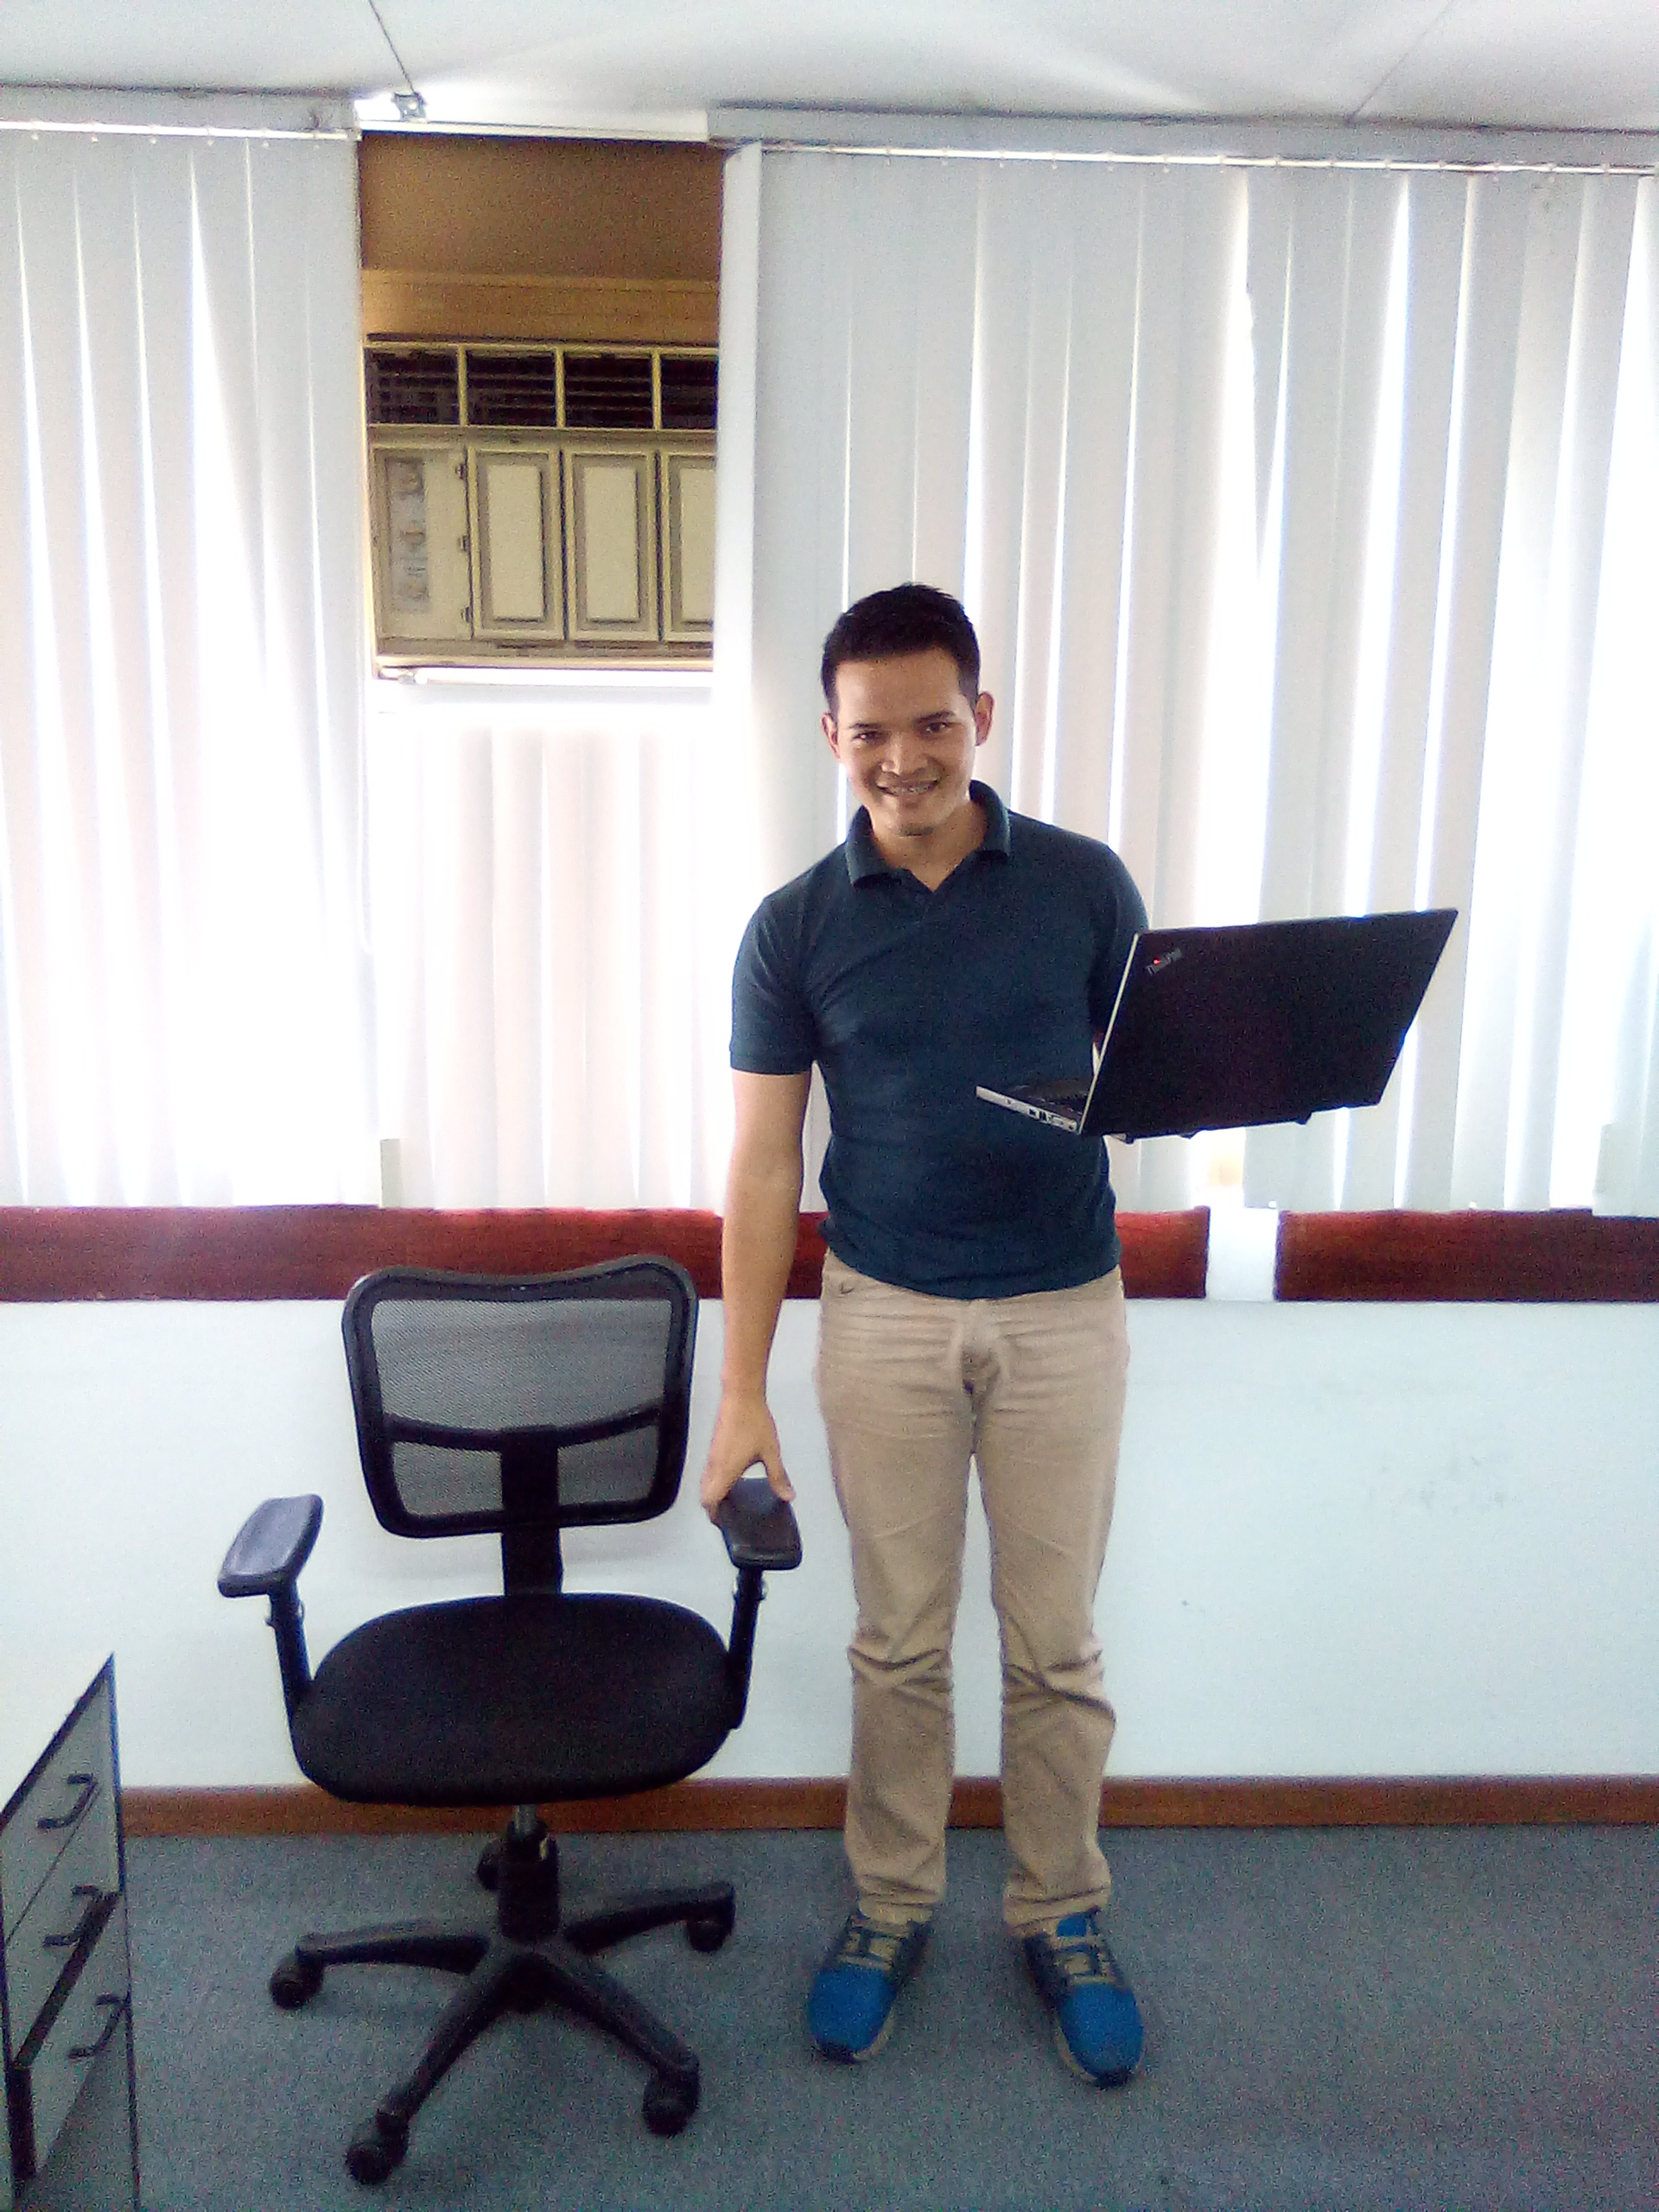

foto2.jpg es un Humano


In [38]:
import numpy as np
from keras.preprocessing import image

path= 'foto2.jpg'
img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
  

from IPython.display import Image
display(Image(filename=path, width= 300, height= 100))
 
if classes[0]>0.5:
    print(path + " es un Humano")
else:
    print(path + " es un Caballo")

## Visualizar representaciones intermedias
visualizar cómo se transforma una entrada a medida que pasa a través de la red.

elegir una imagen aleatoria del conjunto de entrenamiento y luego generar una figura donde cada fila es la salida de una capa, y cada imagen en la fila es un filtro específico en ese mapa de características de salida.

/home/gasz/virtual/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


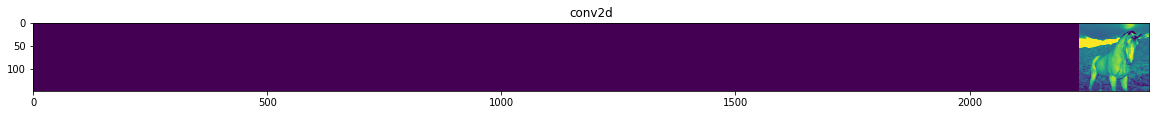

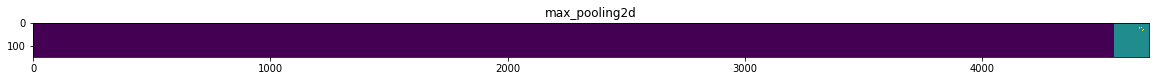

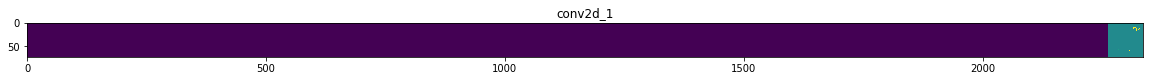

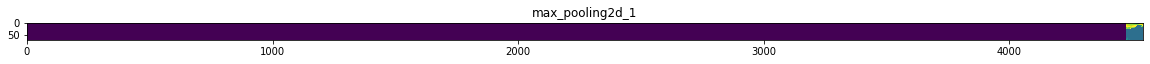

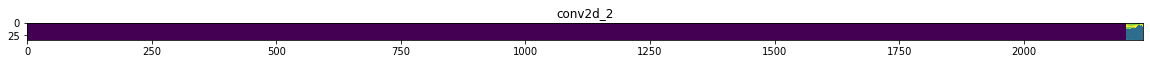

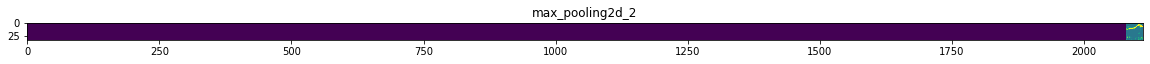

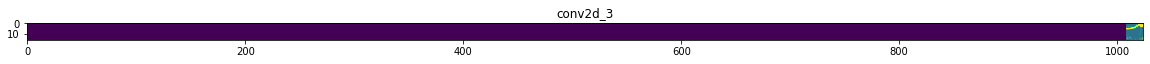

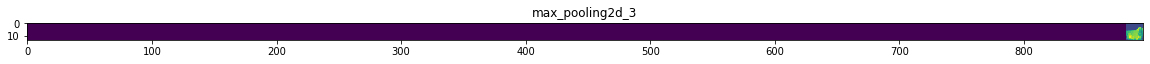

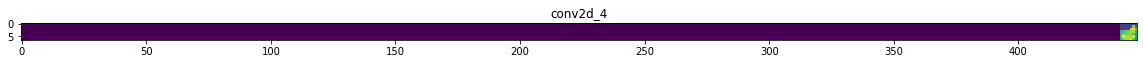

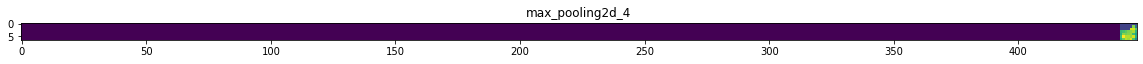

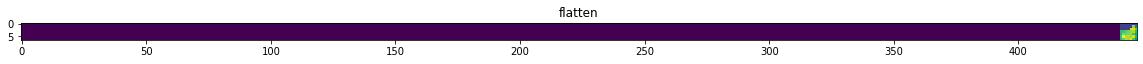

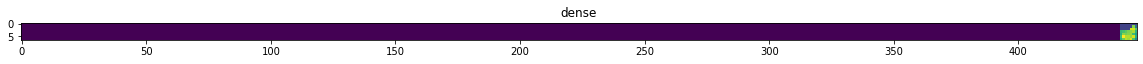

In [41]:

import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
    # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
      # Postprocess the feature to make it visually palatable
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
        display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Como puede ver, pasamos de los píxeles sin procesar de las imágenes a representaciones cada vez más abstractas y compactas. Las representaciones posteriores comienzan a resaltar a qué presta atención la red y muestran cada vez menos características que se "activan"; la mayoría se ponen a cero.

Estas representaciones llevan cada vez menos información sobre los píxeles originales de la imagen, pero información cada vez más refinada sobre la clase de la imagen.